In [1]:
import pandas as pd,numpy as np
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ls_data = pd.read_csv("Leads.csv")
ls_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# Checking for data types
ls_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [4]:
ls_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
# checking shape of data i.e. rows and columns
ls_data.shape

(9240, 37)

In [6]:
# checking for null values percentage in each columns
ls_data.isnull().sum()/len(ls_data)*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

#### 
- Also Lot of variables has 'Select' values which are considered to be null values so it should be replaced with Nan.
- Columns have large number of null values i.e. greater then 40% so ideally it should be dropped.
- Since 'Project ID' and 'lead Number' are of no use in regression model and also all have unique values they can be dropped.

In [7]:
# Replace 'Select' with Nan values
ls_data = ls_data.replace('Select', np.nan)

In [8]:
# checking again the null values count
round((ls_data.isnull().sum()/len(ls_data)*100),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [9]:
# Dropping columns having greater then 40% null values
cols = ls_data.columns

for i in cols:
    if ((ls_data[i].isnull().sum()/len(ls_data)*100) >= 40):
        ls_data.drop(i,axis=1,inplace=True)

In [10]:
round((ls_data.isnull().sum()/len(ls_data)*100),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

#### Still there are columns with missing value percentage between 25-40% lets check every column one by one.
- Lets go with country column first.

### 1. Country column

In [11]:
# - lets check the value counts in it.
(ls_data.Country.value_counts(normalize=True,dropna=False))*100

India                   70.259740
NaN                     26.634199
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Bahrain                  0.075758
Hong Kong                0.075758
Oman                     0.064935
France                   0.064935
unknown                  0.054113
Kuwait                   0.043290
South Africa             0.043290
Canada                   0.043290
Nigeria                  0.043290
Germany                  0.043290
Sweden                   0.032468
Philippines              0.021645
Uganda                   0.021645
Italy                    0.021645
Bangladesh               0.021645
Netherlands              0.021645
Asia/Pacific Region      0.021645
China                    0.021645
Belgium                  0.021645
Ghana                    0.021645
Kenya         

In [12]:
# Since there is no use of imputing the null values with 'India' as 97% of the data will be India
# This shows a heavy data imbalance so it will be better to drop the country column.

# Dropping Country column
ls_data.drop('Country',axis=1,inplace=True)

### 2. Specialization column

In [13]:
# lets check 'Specialization' column
(ls_data.Specialization.value_counts(normalize=True,dropna=False))*100

NaN                                  36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

In [14]:
# Since there are lots management specializations we will combine them first into one Management specialization.
ls_data['Specialization'] = ls_data['Specialization'].replace(['Finance Management','Human Resource Management','Marketing Management',
                                                             'Operations Management','IT Projects Management','Supply Chain Management',
                                                             'Healthcare Management','Hospitality Management','Retail Management'],
                                                              'Management specialization')

ls_data['Specialization'] = ls_data['Specialization'].replace(['Business Administration','International Business',
                                                               'Rural and Agribusiness','E-Business'],'Business specialization')

In [15]:
(ls_data.Specialization.value_counts(normalize=True,dropna=False))*100

Management specialization            46.028139
NaN                                  36.580087
Business specialization               7.694805
Banking, Investment And Insurance     3.658009
Media and Advertising                 2.196970
Travel and Tourism                    2.196970
E-COMMERCE                            1.212121
Services Excellence                   0.432900
Name: Specialization, dtype: float64

In [16]:
# Since the Nan is nothing but users who didnt choose any specialization so we will say it as 'Not specified'
ls_data['Specialization'] = ls_data['Specialization'].replace(np.nan,'Not specified')

### 3. 'What is your current occupation' column

In [17]:
(ls_data['What is your current occupation'].value_counts(normalize=True,dropna=False))*100

Unemployed              60.606061
NaN                     29.112554
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64

In [18]:
# Imputing nan with unemployed data as mode is 'Unemployed'
ls_data['What is your current occupation'] = ls_data['What is your current occupation'].replace(np.nan,'Unemployed')

In [19]:
# Now since student,House wife,other and businessmen have very low count we can combine them in one category such as 'Others'
ls_data['What is your current occupation'] = ls_data['What is your current occupation'].replace(['Student','Other','Housewife',
                                                                                                'Businessman'],'Others')

In [20]:
(ls_data['What is your current occupation'].value_counts(normalize=True,dropna=False))*100

Unemployed              89.718615
Working Professional     7.640693
Others                   2.640693
Name: What is your current occupation, dtype: float64

In [21]:
# Checking Null values greater then 5%
cols = ls_data.columns
print("Columns greater then 5% null values are:")
for i in cols:
    if ((ls_data[i].isnull().sum()/len(ls_data)*100) >= 20):
        print(i,ls_data[i].isnull().sum()/len(ls_data)*100)

Columns greater then 5% null values are:
What matters most to you in choosing a course 29.318181818181817
Tags 36.28787878787879
City 39.70779220779221


### 4. 'What matters most to you in choosing a course' Column

In [22]:
(ls_data['What matters most to you in choosing a course'].value_counts(normalize=True,dropna=False))*100

Better Career Prospects      70.649351
NaN                          29.318182
Flexibility & Convenience     0.021645
Other                         0.010823
Name: What matters most to you in choosing a course, dtype: float64

In [23]:
# Since The Better career prospects and Nan combined show a heavy data imbalance so its of no use imputing.
# So we will drop this column also.

ls_data.drop('What matters most to you in choosing a course',axis=1,inplace=True)

### 5.Tags Column

In [24]:
(ls_data['Tags'].value_counts(normalize=True,dropna=False))*100

NaN                                                  36.287879
Will revert after reading the email                  22.424242
Ringing                                              13.019481
Interested in other courses                           5.551948
Already a student                                     5.032468
Closed by Horizzon                                    3.874459
switched off                                          2.597403
Busy                                                  2.012987
Lost to EINS                                          1.893939
Not doing further education                           1.569264
Interested  in full time MBA                          1.266234
Graduation in progress                                1.201299
invalid number                                        0.898268
Diploma holder (Not Eligible)                         0.681818
wrong number given                                    0.508658
opp hangup                                            0

In [25]:
# Since Tag column contains tags given by the sales team which can change and is of not much importance to us so we can drop this column.
# Also null value% is high.

ls_data.drop('Tags',axis=1,inplace=True)

### 6. City Column

In [26]:
(ls_data['City'].value_counts(normalize=True,dropna=False))*100

NaN                            39.707792
Mumbai                         34.870130
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: City, dtype: float64

In [27]:
# Since Mumbai has the highest count we can impute Nan with mumbai.
ls_data['City'] = ls_data['City'].replace(np.nan,'Mumbai')

In [28]:
(ls_data['City'].value_counts(normalize=True,dropna=False))*100

Mumbai                         74.577922
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: City, dtype: float64

In [29]:
#  We can categorise groups here based on cities
ls_data['City'] = ls_data['City'].replace(['Thane & Outskirts','Other Cities of Maharashtra'],'Other cities of maharashtra')
ls_data['City'] = ls_data['City'].replace(['Other Cities','Other Metro Cities','Tier II Cities'],'Cities outside maharashtra')

In [30]:
(ls_data['City'].value_counts(normalize=True,dropna=False))*100

Mumbai                         74.577922
Other cities of maharashtra    13.084416
Cities outside maharashtra     12.337662
Name: City, dtype: float64

In [31]:
# Checking Null values %
cols = ls_data.columns
print("Columns greater then 0% null values are:")
for i in cols:
    if ((ls_data[i].isnull().sum()/len(ls_data)*100) > 0):
        print(i,ls_data[i].isnull().sum()/len(ls_data)*100)

Columns greater then 0% null values are:
Lead Source 0.38961038961038963
TotalVisits 1.4826839826839828
Page Views Per Visit 1.4826839826839828
Last Activity 1.1147186147186148


### 7. Lead source column

In [32]:
(ls_data['Lead Source'].value_counts(normalize=True,dropna=False))*100

Google               31.038961
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
NaN                   0.389610
bing                  0.064935
google                0.054113
Click2call            0.043290
Press_Release         0.021645
Social Media          0.021645
Live Chat             0.021645
youtubechannel        0.010823
testone               0.010823
Pay per Click Ads     0.010823
welearnblog_Home      0.010823
WeLearn               0.010823
blog                  0.010823
NC_EDM                0.010823
Name: Lead Source, dtype: float64

In [33]:
# Imputing Nan with Google, you can see that there is another google in small letters so impute it also.
ls_data['Lead Source'] = ls_data['Lead Source'].replace([np.nan,'google'],'Google')

# We can put lead sources with low count in one category.
ls_data['Lead Source'] = ls_data['Lead Source'].replace(['bing','Click2call','Press_Release','Live Chat','youtubechannel',
                                                         'testone','Pay per Click Ads','welearnblog_Home','WeLearn','NC_EDM','blog'],
                                                        'Others')

# Also since Facebook and youtubechannel is a social media platform so you merge them.
ls_data['Lead Source'] = ls_data['Lead Source'].replace(['Facebook','youtubechannel'],'Social Media')

In [34]:
(ls_data['Lead Source'].value_counts(normalize=True,dropna=False))*100

Google              31.482684
Direct Traffic      27.521645
Olark Chat          18.993506
Organic Search      12.489177
Reference            5.779221
Welingak Website     1.536797
Referral Sites       1.352814
Social Media         0.616883
Others               0.227273
Name: Lead Source, dtype: float64

### 8. 'TotalVisits' column

In [35]:
# Since this is a numerical variable lets see if there are any outliers heres.
ls_data['TotalVisits'].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

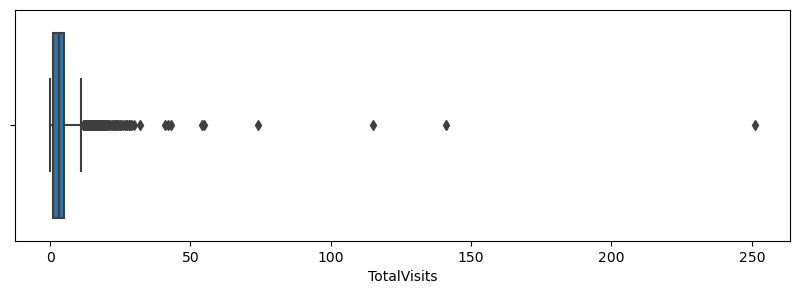

In [36]:
# There seems to be outliers here since the max value is very high from the 75th percentile
# lets plot a boxplot for the same.
plt.figure(figsize=(10,3))
sns.boxplot(ls_data['TotalVisits'])
plt.show()

In [37]:
# lets check for different percentiles
ls_data['TotalVisits'].describe(percentiles=[0.1,0.25,0.50,0.95,0.96,0.97,0.98,0.99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
10%         0.000000
25%         1.000000
50%         3.000000
95%        10.000000
96%        10.000000
97%        11.000000
98%        13.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [38]:
# We will cap the values till 96th percentile here.
percentile = ls_data['TotalVisits'].quantile([0.05,0.96]).values
ls_data['TotalVisits'][ls_data['TotalVisits']<= percentile[0]] = percentile[0]
ls_data['TotalVisits'][ls_data['TotalVisits']>= percentile[1]] = percentile[1]

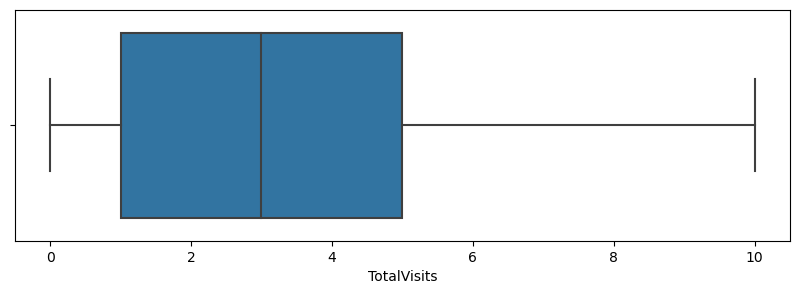

In [39]:
plt.figure(figsize=(10,3))
sns.boxplot(ls_data['TotalVisits'])
plt.show()

In [40]:
(ls_data['TotalVisits'].value_counts(normalize=True,dropna=False))*100

0.0     23.690476
2.0     18.181818
3.0     14.134199
4.0     12.121212
5.0      8.474026
10.0     5.054113
6.0      5.043290
1.0      4.274892
7.0      3.344156
8.0      2.424242
9.0      1.774892
NaN      1.482684
Name: TotalVisits, dtype: float64

In [41]:
# here we will impute the null values with 0 as it it the mode of the column.
ls_data['TotalVisits'] = ls_data['TotalVisits'].replace(np.nan,0)

In [42]:
(ls_data['TotalVisits'].value_counts(normalize=True,dropna=False))*100

0.0     25.173160
2.0     18.181818
3.0     14.134199
4.0     12.121212
5.0      8.474026
10.0     5.054113
6.0      5.043290
1.0      4.274892
7.0      3.344156
8.0      2.424242
9.0      1.774892
Name: TotalVisits, dtype: float64

In [43]:
# Checking Null values %
cols = ls_data.columns
print("Columns greater then 0% null values are:")
for i in cols:
    if ((ls_data[i].isnull().sum()/len(ls_data)*100) > 0):
        print(i,ls_data[i].isnull().sum()/len(ls_data)*100)

Columns greater then 0% null values are:
Page Views Per Visit 1.4826839826839828
Last Activity 1.1147186147186148


### 9. 'Page Views Per Visit' column

In [44]:
(ls_data['Page Views Per Visit'].value_counts(normalize=True,dropna=False))*100

0.00    23.690476
2.00    19.426407
3.00    12.943723
4.00     9.696970
1.00     7.045455
          ...    
2.56     0.010823
6.33     0.010823
1.64     0.010823
8.21     0.010823
2.08     0.010823
Name: Page Views Per Visit, Length: 115, dtype: float64

In [45]:
ls_data['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [46]:
ls_data['Page Views Per Visit'].describe(percentiles=[0.50,0.95,0.96,0.97,0.98,0.99])

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
50%         2.000000
95%         6.000000
96%         6.000000
97%         7.000000
98%         8.000000
99%         9.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

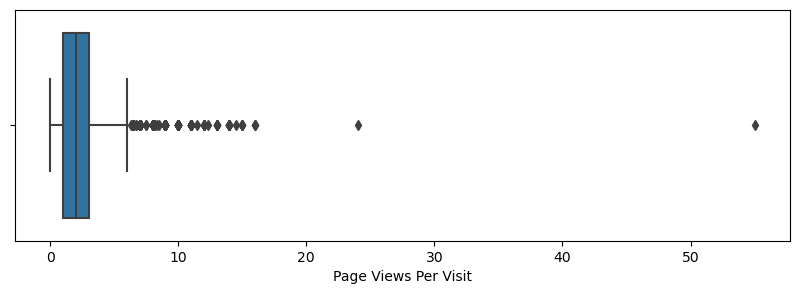

In [47]:
plt.figure(figsize=(10,3))
sns.boxplot(ls_data['Page Views Per Visit'])
plt.show()

In [48]:
# We will cap the values till 96th percentile here.
percentile = ls_data['Page Views Per Visit'].quantile([0.05,0.96]).values
ls_data['Page Views Per Visit'][ls_data['Page Views Per Visit']<= percentile[0]] = percentile[0]
ls_data['Page Views Per Visit'][ls_data['Page Views Per Visit']>= percentile[1]] = percentile[1]

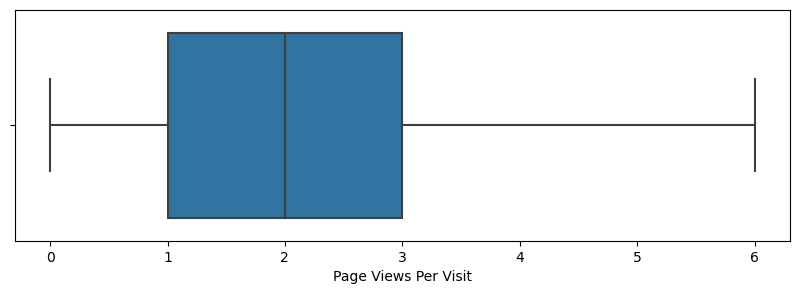

In [49]:
plt.figure(figsize=(10,3))
sns.boxplot(ls_data['Page Views Per Visit'])
plt.show()

In [50]:
# replacing null values with median value
ls_data['Page Views Per Visit'] = ls_data['Page Views Per Visit'].replace(np.nan,ls_data['Page Views Per Visit'].median())

In [51]:
ls_data['Page Views Per Visit'].isnull().sum()

0

### 10. Last activity column

In [52]:
(ls_data['Last Activity'].value_counts(normalize=True,dropna=False))*100

Email Opened                    37.196970
SMS Sent                        29.707792
Olark Chat Conversation         10.530303
Page Visited on Website          6.926407
Converted to Lead                4.632035
Email Bounced                    3.528139
Email Link Clicked               2.889610
Form Submitted on Website        1.255411
NaN                              1.114719
Unreachable                      1.006494
Unsubscribed                     0.660173
Had a Phone Conversation         0.324675
Approached upfront               0.097403
View in browser link Clicked     0.064935
Email Received                   0.021645
Email Marked Spam                0.021645
Visited Booth in Tradeshow       0.010823
Resubscribed to emails           0.010823
Name: Last Activity, dtype: float64

In [53]:
# We will replace nulol values with mode of the column.
ls_data['Last Activity'] = ls_data['Last Activity'].replace(np.nan,'Email Opened')

# As rest of the categories has less data we will group them together.
ls_data['Last Activity'] = ls_data['Last Activity'].replace(['Unreachable','Unsubscribed','Had a Phone Conversation',
                                                             'Approached upfront','View in browser link Clicked',
                                                             'Email Received','Email Marked Spam','Visited Booth in Tradeshow',
                                                             'Resubscribed to emails'],'Others')

In [54]:
(ls_data['Last Activity'].value_counts(normalize=True,dropna=False))*100

Email Opened                 38.311688
SMS Sent                     29.707792
Olark Chat Conversation      10.530303
Page Visited on Website       6.926407
Converted to Lead             4.632035
Email Bounced                 3.528139
Email Link Clicked            2.889610
Others                        2.218615
Form Submitted on Website     1.255411
Name: Last Activity, dtype: float64

In [55]:
# Now lets check if there are any null values remaining in the dataset.
round((ls_data.isnull().sum()/len(ls_data)*100),2)

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses  

In [56]:
# The columns 'Customer ID' and 'Lead number' serve no purpose as they are all unique numbers and of no use to us.
# So drop 'Customer ID' and 'Lead number'
ls_data.drop(['Prospect ID','Lead Number'],axis=1,inplace=True)

In [57]:
# Lets check for count of unique values in columns.
for v,w in ls_data.select_dtypes(include='object').nunique().to_dict().items():
    print('{} = {}'.format(v,w))

Lead Origin = 5
Lead Source = 9
Do Not Email = 2
Do Not Call = 2
Last Activity = 9
Specialization = 8
What is your current occupation = 3
Search = 2
Magazine = 1
Newspaper Article = 2
X Education Forums = 2
Newspaper = 2
Digital Advertisement = 2
Through Recommendations = 2
Receive More Updates About Our Courses = 1
Update me on Supply Chain Content = 1
Get updates on DM Content = 1
City = 3
I agree to pay the amount through cheque = 1
A free copy of Mastering The Interview = 2
Last Notable Activity = 16


In [58]:
# Since you can see there are columns with single values so you can drop them.
# Columns 'Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content',
# 'Get updates on DM Content','I agree to pay the amount through cheque' can be dropped.

In [59]:
# Also lets check the count in binary columns.
column_list = ['Do Not Email','Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper',
               'Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview']

for i in column_list:
    z=(ls_data[i].value_counts(normalize=True))*100
    print(i)
    print(z)
    print()

Do Not Email
No     92.056277
Yes     7.943723
Name: Do Not Email, dtype: float64

Do Not Call
No     99.978355
Yes     0.021645
Name: Do Not Call, dtype: float64

Search
No     99.848485
Yes     0.151515
Name: Search, dtype: float64

Newspaper Article
No     99.978355
Yes     0.021645
Name: Newspaper Article, dtype: float64

X Education Forums
No     99.989177
Yes     0.010823
Name: X Education Forums, dtype: float64

Newspaper
No     99.989177
Yes     0.010823
Name: Newspaper, dtype: float64

Digital Advertisement
No     99.95671
Yes     0.04329
Name: Digital Advertisement, dtype: float64

Through Recommendations
No     99.924242
Yes     0.075758
Name: Through Recommendations, dtype: float64

A free copy of Mastering The Interview
No     68.744589
Yes    31.255411
Name: A free copy of Mastering The Interview, dtype: float64



In [60]:
# Since there is heavy data imbalance as more then 99% is dominated so its better to drop this columns also.

In [61]:
# So the list of columns to be dropped are 
drop_columns = ['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content',
                'Get updates on DM Content','I agree to pay the amount through cheque','Do Not Call','Search',
                'Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations']

ls_data.drop(drop_columns,axis=1,inplace=True)

In [62]:
ls_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9240 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9240 non-null   float64
 7   Last Activity                           9240 non-null   object 
 8   Specialization                          9240 non-null   object 
 9   What is your current occupation         9240 non-null   object 
 10  City                                    9240 non-null   obje

In [63]:
# Also we have noticed that Last notable activity has many categories lets check their counts.
(ls_data['Last Notable Activity'].value_counts(normalize=True))*100

Modified                        36.872294
Email Opened                    30.595238
SMS Sent                        23.506494
Page Visited on Website          3.441558
Olark Chat Conversation          1.980519
Email Link Clicked               1.872294
Email Bounced                    0.649351
Unsubscribed                     0.508658
Unreachable                      0.346320
Had a Phone Conversation         0.151515
Email Marked Spam                0.021645
Approached upfront               0.010823
Resubscribed to emails           0.010823
View in browser link Clicked     0.010823
Form Submitted on Website        0.010823
Email Received                   0.010823
Name: Last Notable Activity, dtype: float64

In [64]:
# clubbing together the categories with least count.
ls_data['Last Notable Activity'] = ls_data['Last Notable Activity'].replace(['Unreachable','Unsubscribed','Email Bounced','Had a Phone Conversation',
                                                             'Approached upfront','View in browser link Clicked',
                                                             'Email Received','Email Marked Spam','Form Submitted on Website',
                                                             'Resubscribed to emails'],'Others')

In [65]:
(ls_data['Last Notable Activity'].value_counts(normalize=True))*100

Modified                   36.872294
Email Opened               30.595238
SMS Sent                   23.506494
Page Visited on Website     3.441558
Olark Chat Conversation     1.980519
Email Link Clicked          1.872294
Others                      1.731602
Name: Last Notable Activity, dtype: float64

## Univariate analysis

### Let's check conversion rate of all the categorical variables.

In [66]:
# Lets create a function instead of writing the code again and again.
def count_plot(var):
    plt.figure(figsize=(12,3))
    sns.countplot(ls_data[var])
    plt.xticks(rotation = 30)
    plt.title(var)
    plt.show()

In [67]:
# Function for conversion rate
def con_rate(var):
    plt.figure(figsize=(12,3))
    sns.countplot(ls_data[var],hue=ls_data['Converted'])
    plt.xticks(rotation = 30)
    plt.title('Conversions in terms of {}'.format(var))
    plt.show()

### 1. Lead Origin

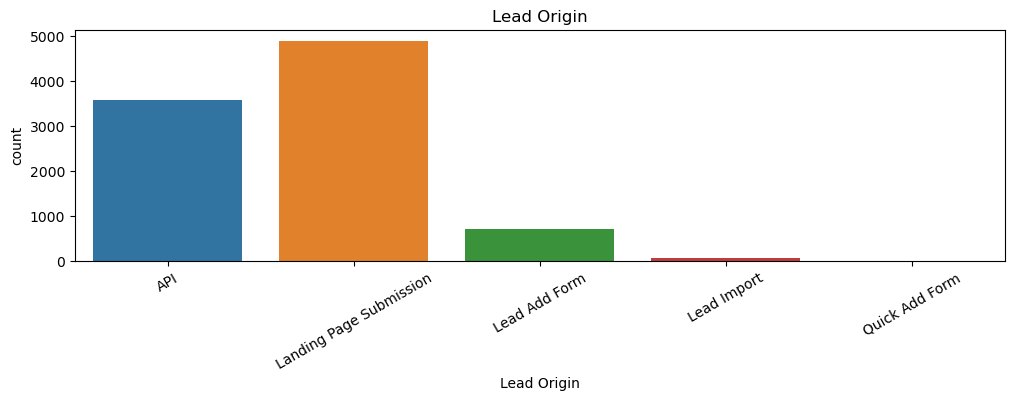

In [68]:
# Lets plot a countplot for this.
count_plot('Lead Origin')

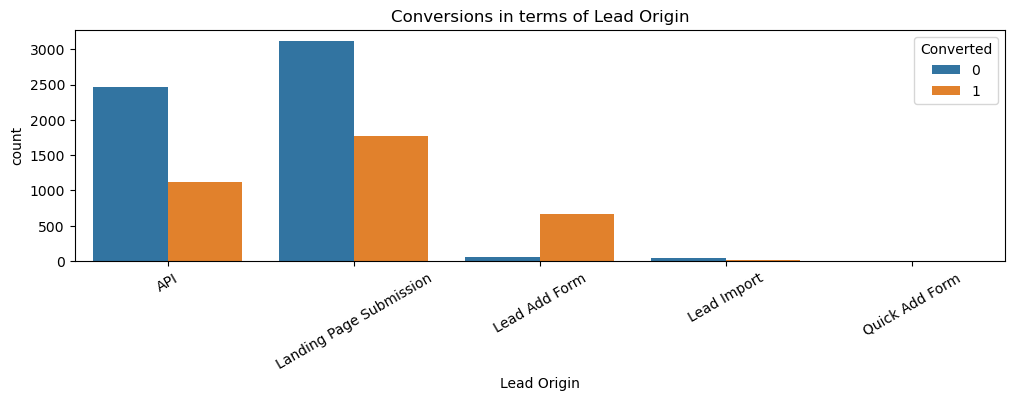

In [69]:
# lets check the lead conversion of each category
con_rate('Lead Origin')

- We can see that API and LP submission has has higher number of lead conversions
- Lead add form has higher number of lead conversion rate
- Focus on API and LP submission as they bring higher number of conversion in terms of counts.
- Also try to generate more leads from lead add form as it has higher number of conversion rate

### 2. Lead Source

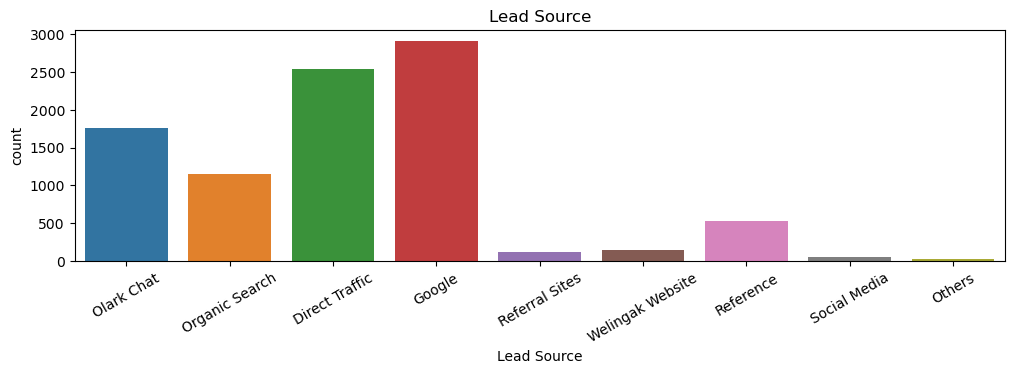

In [70]:
count_plot('Lead Source')

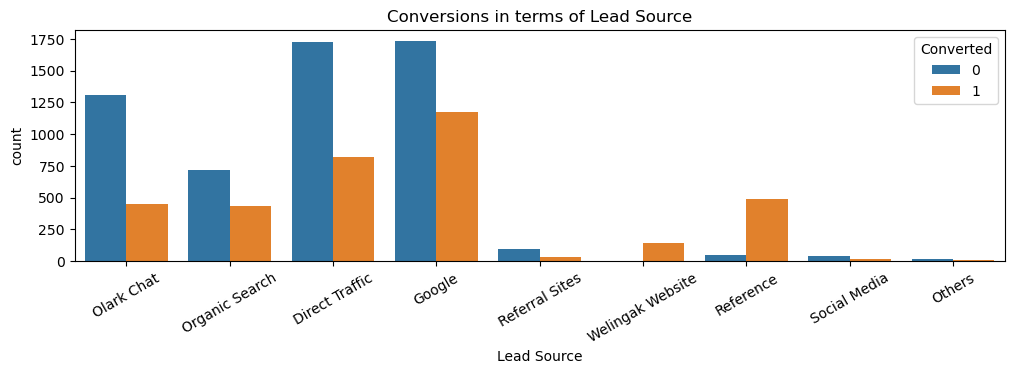

In [71]:
con_rate('Lead Source')

- We can see that olark chat, organic search, direct traffic, Google has majority of lead conversions in terms of count,
  so focus on increasing the lead conversions to this categories.
- Welingak website and reference has higher number of lead conversion rate but count is low.
- Main focus should be on 4 major categories.

### 3. Do Not Email

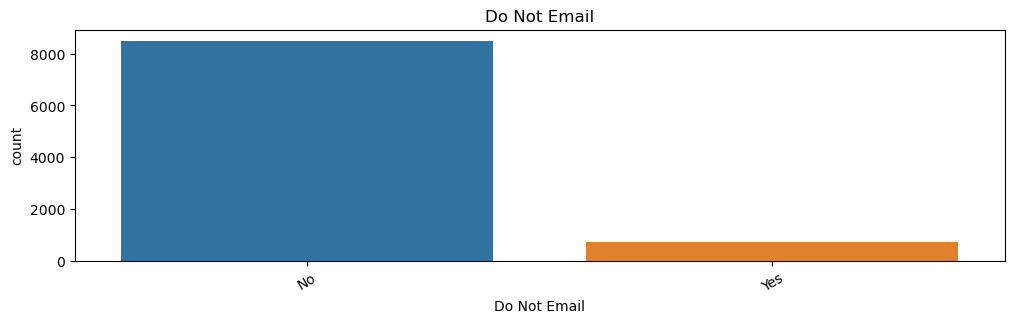

In [72]:
count_plot('Do Not Email')

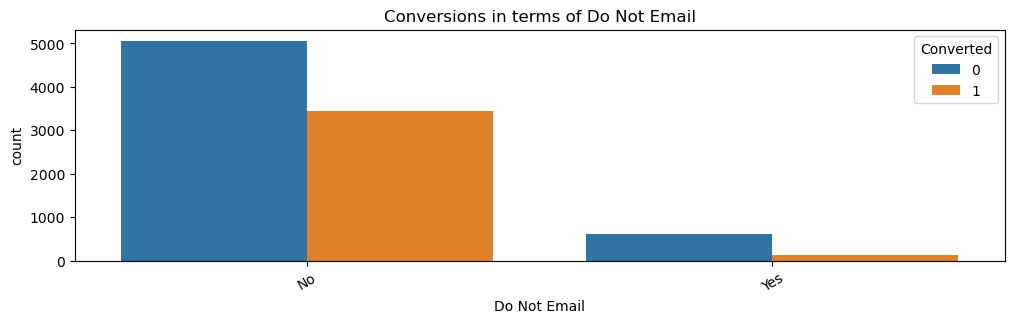

In [73]:
con_rate('Do Not Email')

- This shows that most of the customers does not like to be emailed regarding the course.
- Also focus on leads showing NO, as the conversion rate is very low for them.

### 4. Converted

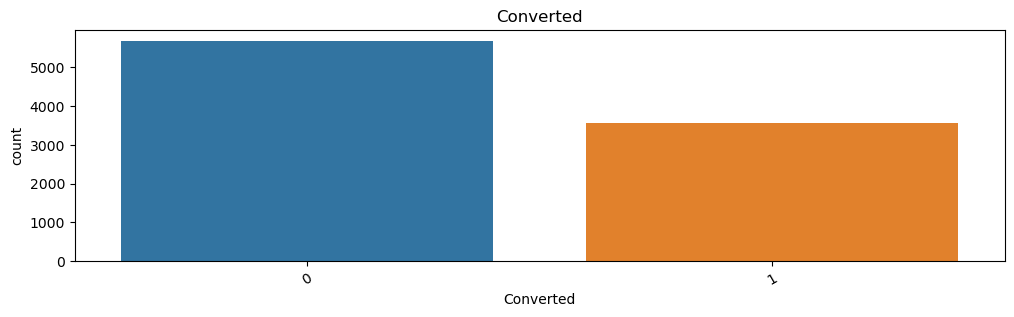

In [74]:
count_plot('Converted')

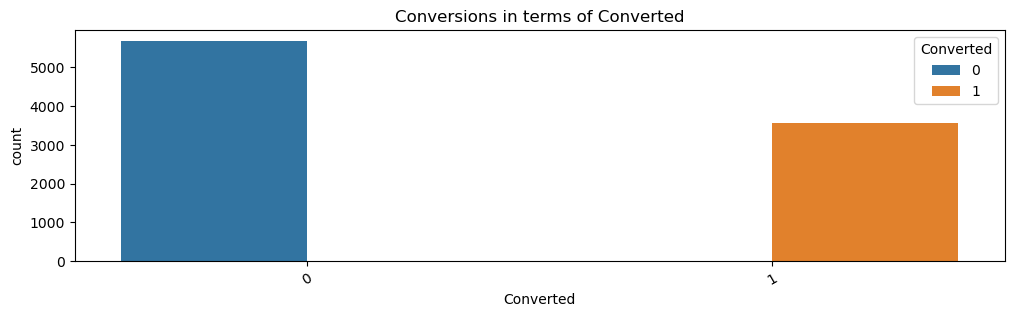

In [75]:
con_rate('Converted')

In [76]:
# lets check the conversion rate overall
(sum(ls_data['Converted'])/len(ls_data))*100

38.53896103896104

### The overall conversion rate is 38.54 %

### 5. TotalVisits

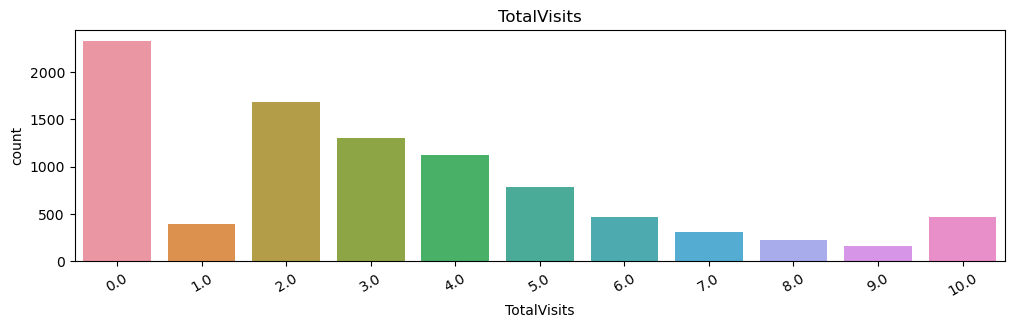

In [77]:
count_plot('TotalVisits')

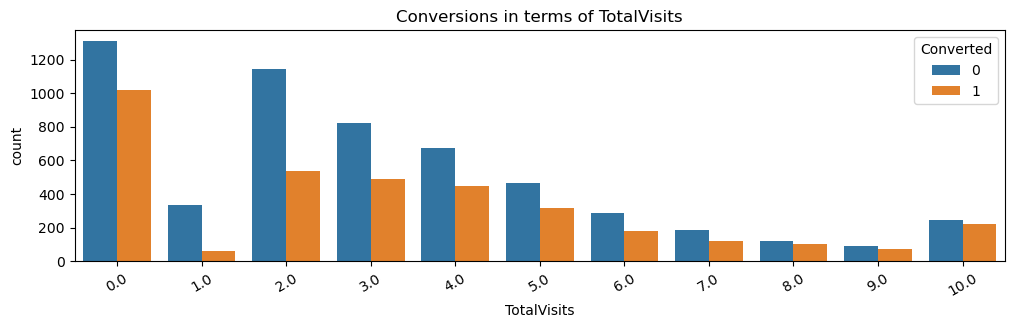

In [78]:
con_rate('TotalVisits')

- Most of the leads have not visited

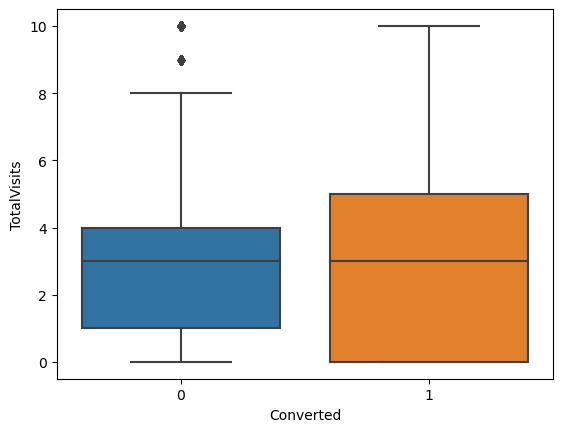

In [79]:
sns.boxplot(y='TotalVisits',x='Converted',data=ls_data)
plt.show()

- We can see that the median is same for both 0 and 1.

### 6. Total Time Spent on Website

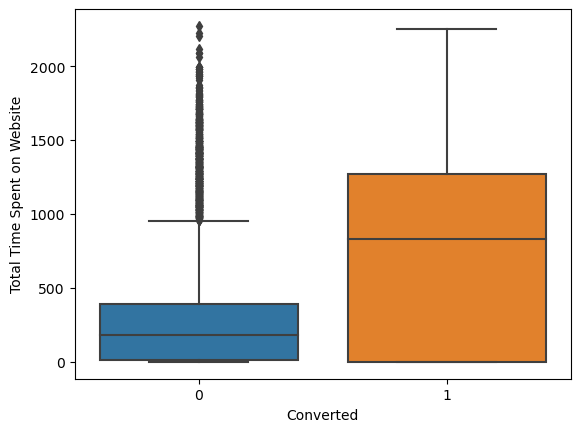

In [80]:
sns.boxplot(y='Total Time Spent on Website',x='Converted',data=ls_data)
plt.show()

- This shows that more the time spent on website more are the leads that got converted.
- People who have spent less time have not converted.

### 7. Page Views Per Visit

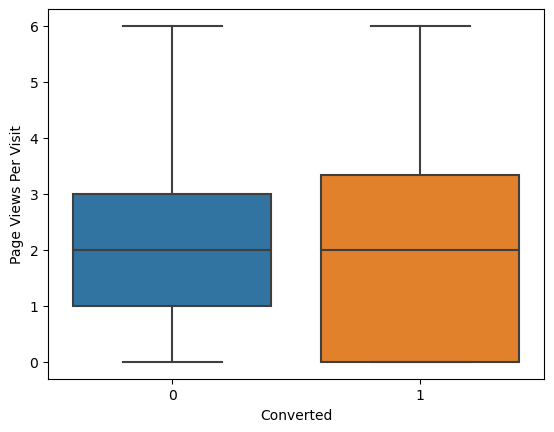

In [81]:
sns.boxplot(y='Page Views Per Visit',x='Converted',data=ls_data)
plt.show()

- Median for both the opted and not opted is same.
- people who have visited 1-3 on avergare have 50-50 percent chances of getting converted.

### 8. Last Activity

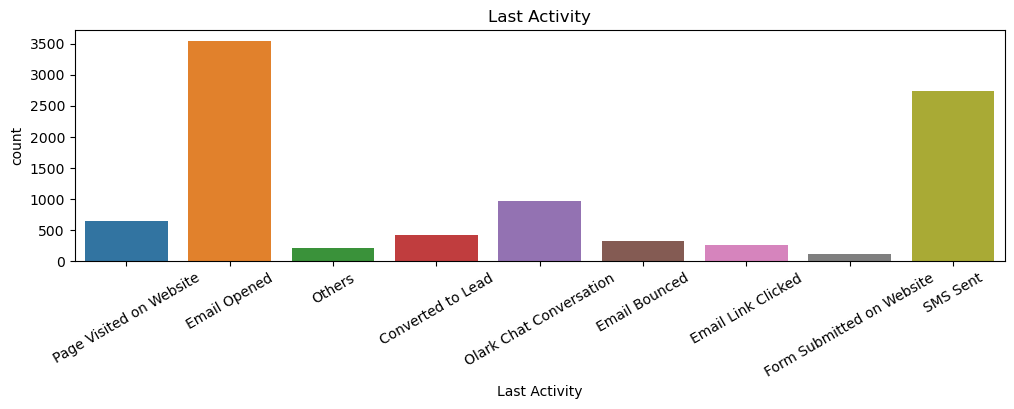

In [82]:
count_plot('Last Activity')

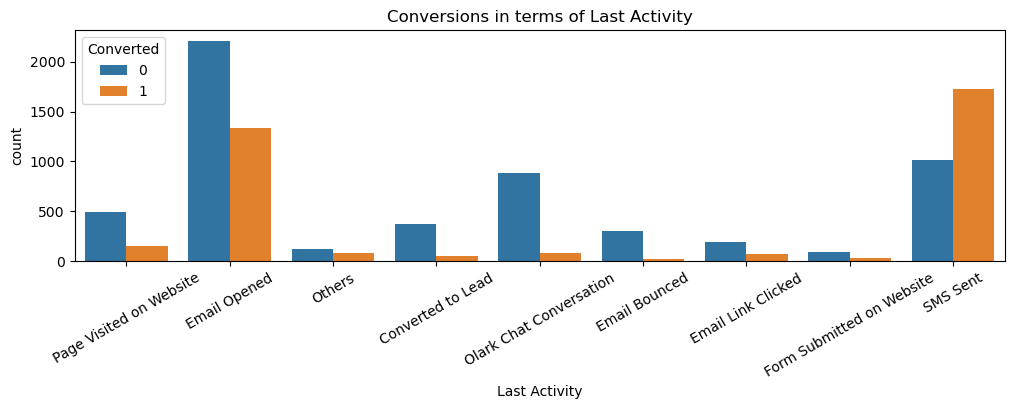

In [83]:
con_rate('Last Activity')

- Most leads are generated by email opened and SMS sent.
- Conversion rate of SMS sent is good so try to improve it more.
- Need to focus more on Olark chat as the conversion rate is poor.
- Focus more on Page visited more on website,Converted to lead, Email bounced.

### 9. Specialization

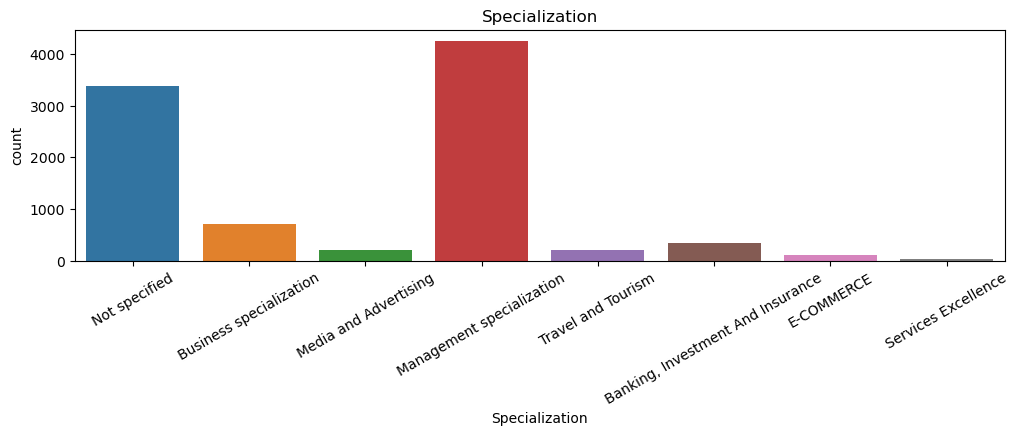

In [84]:
count_plot('Specialization')

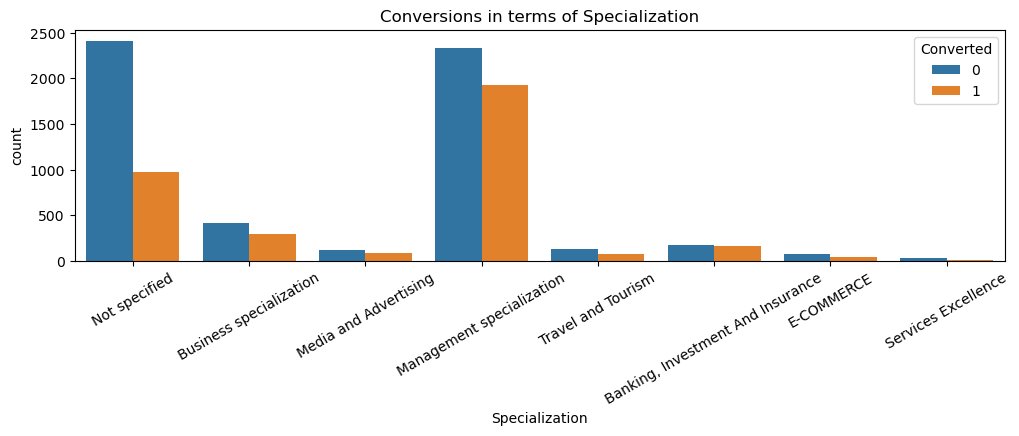

In [85]:
con_rate('Specialization')

- Not specified and Management specialisation produce the most number of successful leads.
- Focus on these 2 categories and try to increase the lead conversion rate.
- Management specialization has highest leads and Service excellence has lowest leads.

### 10. What is your current occupation

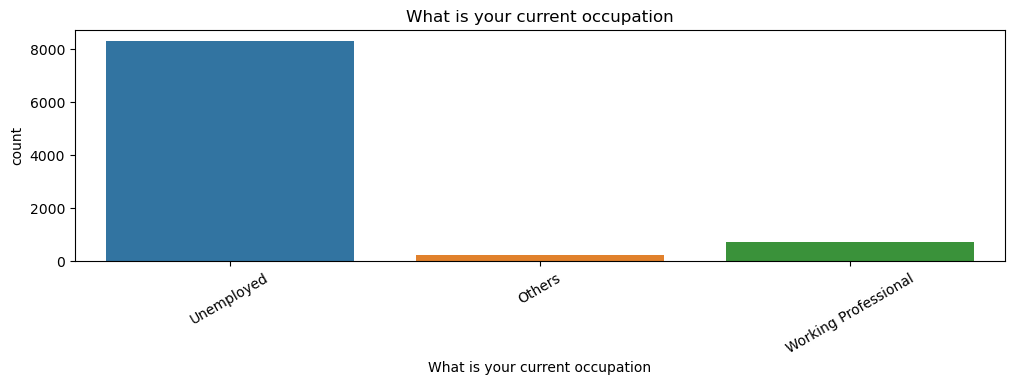

In [86]:
count_plot('What is your current occupation')

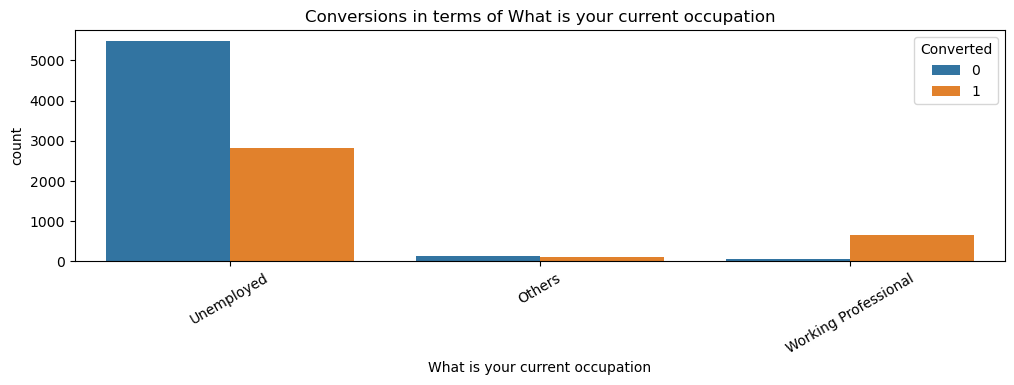

In [87]:
con_rate('What is your current occupation')

- Most of the costumers are unemployed and the conversion rate is also not good.
- Conversion rate of Working professional is good so try to improve it more.
- Focus on Unemployed and try to increase conversion rate.

### 11. City

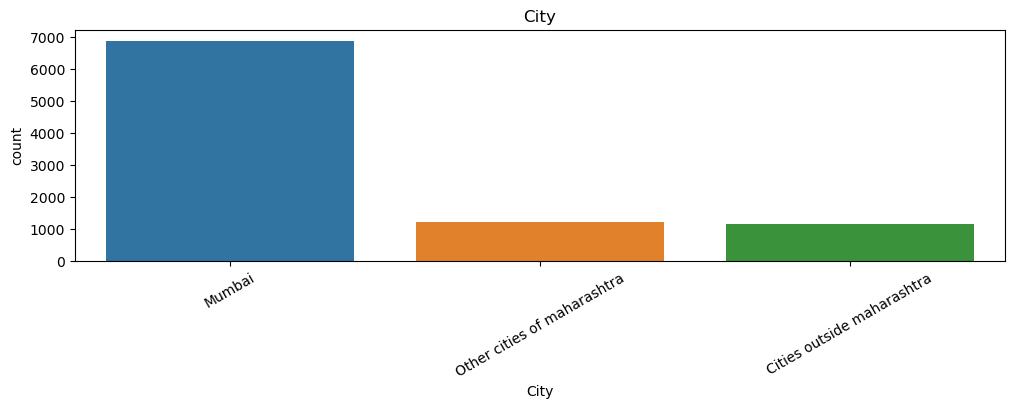

In [88]:
count_plot('City')

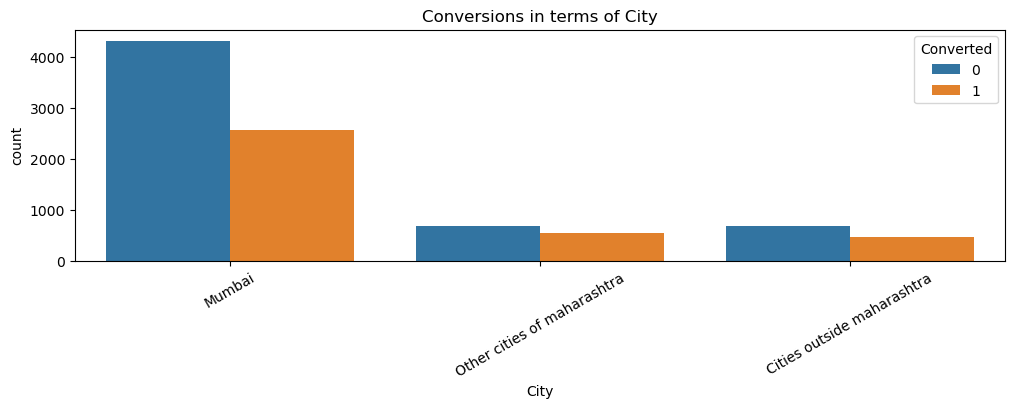

In [89]:
con_rate('City')

- Most leads are generated in mumbai so focus on increasing lead conversion rate in mumbai.
- Other cities and cities outside maharashtra have equal conversion rates.

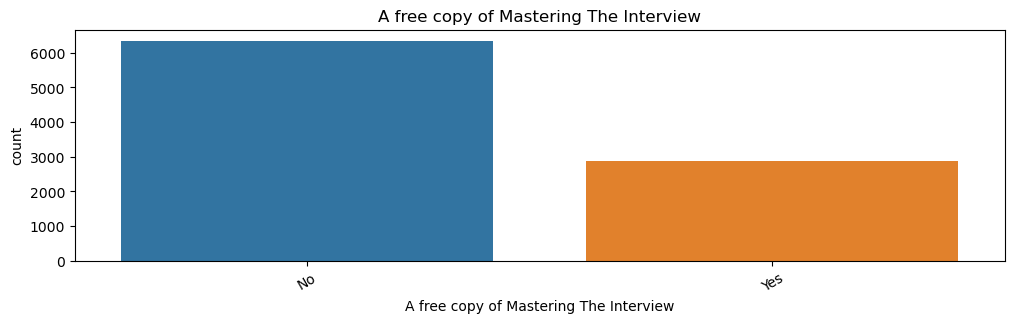

In [90]:
count_plot('A free copy of Mastering The Interview')

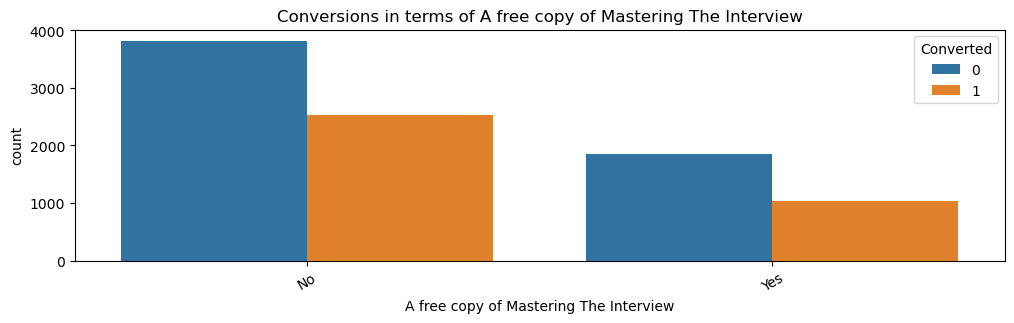

In [91]:
con_rate('A free copy of Mastering The Interview')

- Most customers have not opted for free copy of mastering the interview.

### 12. Last Notable Activity

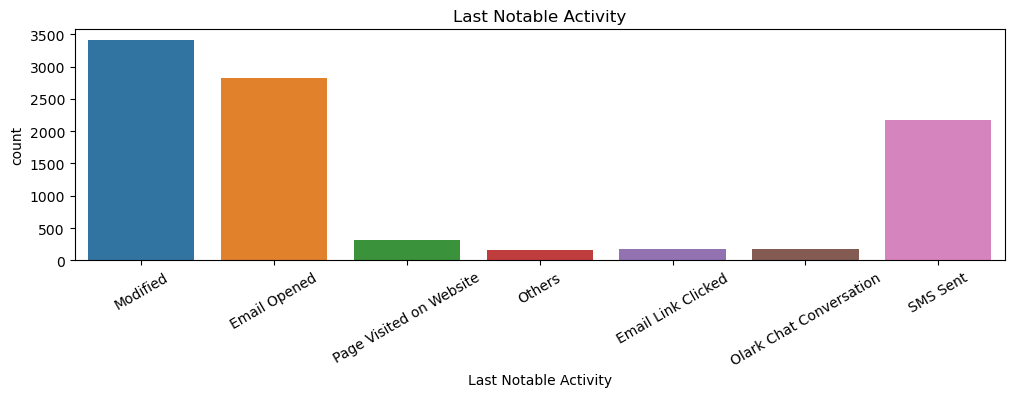

In [92]:
count_plot('Last Notable Activity')

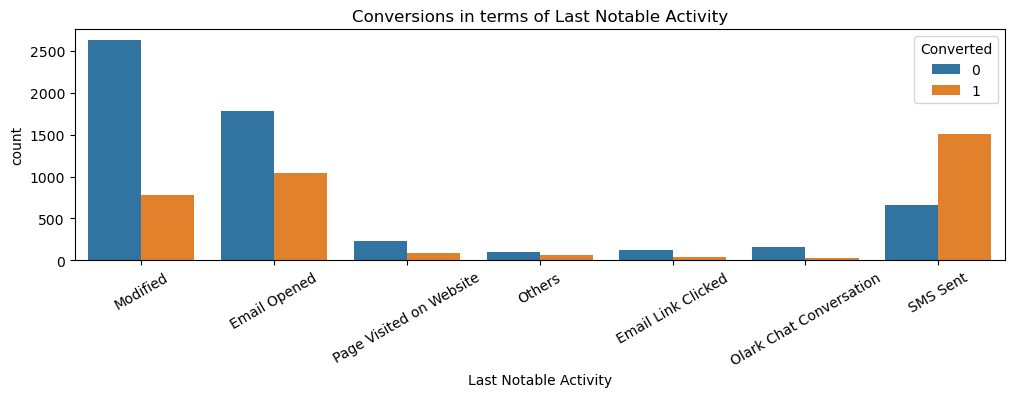

In [93]:
con_rate('Last Notable Activity')

- Modified and Email Opened has most number of leads but lead conversion is not up to the mark.
- Focus on Modified and Email Opened more to increase conversion rate.
- SMS sent has good conversion rate and so there is chance of improvance more.

## Checking for numerical variables

Lets check for correlation

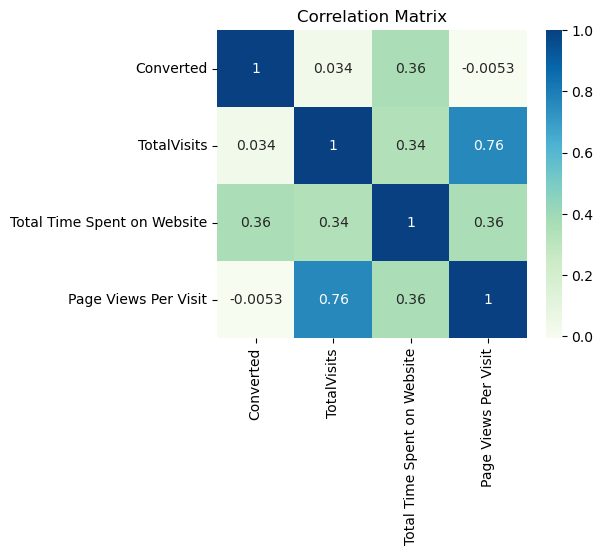

In [94]:
plt.figure(figsize=(5,4))
sns.heatmap(ls_data.corr(),annot=True,cmap='GnBu')
plt.xticks(rotation = 90)
plt.title('Correlation Matrix')
plt.show()

- Since we have high colliniarity between Page views per visit and Total visitors we can drop any one of them.

In [95]:
# Dropping Page views per visit
ls_data.drop('Page Views Per Visit',axis=1,inplace=True)

In [96]:
ls_data.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Last Activity',
       'Specialization', 'What is your current occupation', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

## Data Preparation

In [97]:
ls_data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Last Activity,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,Page Visited on Website,Not specified,Unemployed,Mumbai,No,Modified
1,API,Organic Search,No,0,5.0,674,Email Opened,Not specified,Unemployed,Mumbai,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,Email Opened,Business specialization,Others,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,Others,Media and Advertising,Unemployed,Mumbai,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,Converted to Lead,Not specified,Unemployed,Mumbai,No,Modified


In [98]:
# Converting Yes and No to 1 and 0 resp.
col_list = ['A free copy of Mastering The Interview','Do Not Email']

# We can create Map function
def map_binary(b):
    return b.map({'Yes': 1, "No": 0})

# Applying the function to the col_list
ls_data[col_list] = ls_data[col_list].apply(map_binary)

In [99]:
ls_data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Last Activity,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,Page Visited on Website,Not specified,Unemployed,Mumbai,0,Modified
1,API,Organic Search,0,0,5.0,674,Email Opened,Not specified,Unemployed,Mumbai,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,Email Opened,Business specialization,Others,Mumbai,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,Others,Media and Advertising,Unemployed,Mumbai,0,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,Converted to Lead,Not specified,Unemployed,Mumbai,0,Modified


In [100]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(ls_data[['City', 'Lead Source']], drop_first=True)

# Adding the results to the master dataframe
ls_data = pd.concat([ls_data, dummy1], axis=1)

In [101]:
dummy2 = pd.get_dummies(ls_data['What is your current occupation'], prefix='Current Occupation')
dummy2 = dummy2.drop(['Current Occupation_Working Professional'], 1)
ls_data = pd.concat([ls_data, dummy2], axis=1)

In [102]:
dummy3 = pd.get_dummies(ls_data['A free copy of Mastering The Interview'], prefix='Free copy of Mastering The Interview')
dummy3 = dummy3.drop(['Free copy of Mastering The Interview_0'], 1)
ls_data = pd.concat([ls_data, dummy3], axis=1)

In [103]:
dummy4 = pd.get_dummies(ls_data['Last Notable Activity'], prefix='Last Notable Activity')
dummy4 = dummy4.drop(['Last Notable Activity_Page Visited on Website'], 1)
ls_data = pd.concat([ls_data, dummy4], axis=1)

In [104]:
dummy5 = pd.get_dummies(ls_data['Specialization'], prefix='Specialization')
dummy5 = dummy5.drop(['Specialization_Banking, Investment And Insurance'], 1)
ls_data = pd.concat([ls_data, dummy5], axis=1)

In [105]:
dummy6 = pd.get_dummies(ls_data['Lead Origin'], prefix='Lead Origin')
dummy6 = dummy6.drop(['Lead Origin_Landing Page Submission'], 1)
ls_data = pd.concat([ls_data, dummy6], axis=1)

In [106]:
dummy7 = pd.get_dummies(ls_data['Last Activity'], prefix='Last Activity')
dummy7 = dummy7.drop(['Last Activity_Form Submitted on Website'], 1)
ls_data = pd.concat([ls_data, dummy7], axis=1)

In [107]:
ls_data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Last Activity,Specialization,What is your current occupation,City,...,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent
0,API,Olark Chat,0,0,0.0,0,Page Visited on Website,Not specified,Unemployed,Mumbai,...,0,0,0,0,0,0,0,0,1,0
1,API,Organic Search,0,0,5.0,674,Email Opened,Not specified,Unemployed,Mumbai,...,0,0,0,0,0,1,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,Email Opened,Business specialization,Others,Mumbai,...,0,0,0,0,0,1,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,Others,Media and Advertising,Unemployed,Mumbai,...,0,0,0,0,0,0,0,1,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,Converted to Lead,Not specified,Unemployed,Mumbai,...,0,0,1,0,0,0,0,0,0,0


In [108]:
# Dropping the Original columns as we have dummy variables for them.
categorical_columns = ['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation', 'City', 'Last Notable Activity','City','Do Not Email']

ls_data.drop(categorical_columns,axis=1,inplace=True)

In [109]:
ls_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 42 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Converted                                      9240 non-null   int64  
 1   TotalVisits                                    9240 non-null   float64
 2   Total Time Spent on Website                    9240 non-null   int64  
 3   A free copy of Mastering The Interview         9240 non-null   int64  
 4   City_Mumbai                                    9240 non-null   uint8  
 5   City_Other cities of maharashtra               9240 non-null   uint8  
 6   Lead Source_Google                             9240 non-null   uint8  
 7   Lead Source_Olark Chat                         9240 non-null   uint8  
 8   Lead Source_Organic Search                     9240 non-null   uint8  
 9   Lead Source_Others                             9240 

## Train-Test split

In [110]:
from sklearn.model_selection import train_test_split

In [111]:
# Putting response variable to y
y = ls_data['Converted']

# Putting feature variable to X
X = ls_data.drop('Converted', axis=1)

In [112]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Feature scaling

In [113]:
from sklearn.preprocessing import StandardScaler

In [114]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits',
                                                                                       'Total Time Spent on Website']])

X_train.describe()

,TotalVisits,Total Time Spent on Website,A free copy of Mastering The Interview,City_Mumbai,City_Other cities of maharashtra,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,...,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent
count,6.468000e+03,6.468000e+03,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,...,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000
mean,6.663398e-17,-1.609377e-16,0.311843,0.745980,0.128942,0.320810,0.190167,0.121058,0.002474,0.060297,...,0.005102,0.000155,0.046073,0.036333,0.028293,0.381262,0.102195,0.020717,0.072047,0.300402
std,1.000077e+00,1.000077e+00,0.463282,0.435342,0.335162,0.466824,0.392463,0.326219,0.049679,0.238054,...,0.071252,0.012434,0.209659,0.187131,0.165822,0.485734,0.302929,0.142448,0.258586,0.458468
min,-1.121955e+00,-8.853708e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-1.121955e+00,-8.634138e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-4.554387e-02,-4.352528e-01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.720633e-01,8.098906e-01,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,2.466081e+00,3.271816e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Model Building

In [115]:
import statsmodels.api as sm

### Logistic regression model

In [116]:
# Model 1
X_train_sm = sm.add_constant(X_train)

logm1 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())

var = logm1.fit()

print(var.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6427
Model Family:                Binomial   Df Model:                           40
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2636.5
Date:                Fri, 20 Jan 2023   Deviance:                       5272.9
Time:                        20:02:31   Pearson chi2:                 7.40e+03
No. Iterations:                    31   Pseudo R-squ. (CS):             0.4020
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

## Feature selection using RFE

In [117]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [118]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg,n_features_to_select=15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [119]:
rfe.support_

array([False,  True, False, False, False, False,  True, False, False,
        True, False, False,  True,  True,  True, False, False, False,
       False, False,  True,  True, False, False, False, False,  True,
       False, False,  True,  True, False, False, False,  True, False,
        True,  True, False, False,  True])

In [120]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 14),
 ('Total Time Spent on Website', True, 1),
 ('A free copy of Mastering The Interview', False, 18),
 ('City_Mumbai', False, 19),
 ('City_Other cities of maharashtra', False, 26),
 ('Lead Source_Google', False, 15),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 27),
 ('Lead Source_Others', False, 23),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 25),
 ('Lead Source_Social Media', False, 2),
 ('Lead Source_Welingak Website', True, 1),
 ('Current Occupation_Others', True, 1),
 ('Current Occupation_Unemployed', True, 1),
 ('Free copy of Mastering The Interview_1', False, 7),
 ('Last Notable Activity_Email Link Clicked', False, 12),
 ('Last Notable Activity_Email Opened', False, 10),
 ('Last Notable Activity_Modified', False, 4),
 ('Last Notable Activity_Olark Chat Conversation', False, 9),
 ('Last Notable Activity_Others', True, 1),
 ('Last Notable Activity_SMS Sent', True, 1),
 ('Specialization_Busin

In [121]:
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Current Occupation_Others', 'Current Occupation_Unemployed',
       'Last Notable Activity_Others', 'Last Notable Activity_SMS Sent',
       'Specialization_Not specified', 'Lead Origin_API',
       'Lead Origin_Lead Add Form', 'Last Activity_Email Bounced',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_SMS Sent'],
      dtype='object')

##### Assessing the model with StatsModels

In [122]:
# Model 2
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2668.7
Date:                Fri, 20 Jan 2023   Deviance:                       5337.3
Time:                        20:02:34   Pearson chi2:                 7.56e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3960
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.5146      0.203      2.540      0.011       0.118       0.912
Total Time Spent on Website               1.0712      0.039     27.223      0.000       0.994       1.148
Lead Source_Olark Chat                    0.9757      0.122      8.012      0.000       0.737       1.214
Lead Source_Reference                     0.4073      0.529      0.770      0.441      -0.629       1.444
Lead Source_Welingak Website              2.8287      0.873      3.242      0.001       1.118       4.539
Current Occupation_Others                -2.1439      0.286     -7.492      0.000      -2.705      -1.583
Current Occupation_Unemployed            -2.6611      0.192    -13.867      0.000      -3.037      -2.285
Last Notable Activity_Others              1.6263      0.272      5.970      0.000       1.092       2.160
Last Notable Activity_SMS Sent            1.2935      0.145      8.916      0.000       1.009       1.578
Specialization_Not specified             -1.1133      0.122     -9.131      0.000      -1.352      -0.874
Lead Origin_API                           1.1162      0.128      8.730      0.000       0.866       1.367
Lead Origin_Lead Add Form                 3.8088      0.503      7.570      0.000       2.823       4.795
Last Activity_Email Bounced              -1.6549      0.312     -5.312      0.000      -2.266      -1.044
Last Activity_Email Opened                0.7861      0.106      7.406      0.000       0.578       0.994
Last Activity_Olark Chat Conversation    -0.6971      0.188     -3.705      0.000      -1.066      -0.328
Last Activity_SMS Sent                    0.8536      0.159      5.365      0.000       0.542       1.165
=========================================================================================================
"""

In [123]:
# The P-value for Lead source reference is very high so we will drop it
col = col.drop('Lead Source_Reference',1)

In [124]:
# Model 3
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2669.0
Date:                Fri, 20 Jan 2023   Deviance:                       5337.9
Time:                        20:02:34   Pearson chi2:                 7.50e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3959
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.5161      0.203      2.548      0.011       0.119       0.913
Total Time Spent on Website               1.0709      0.039     27.219      0.000       0.994       1.148
Lead Source_Olark Chat                    0.9752      0.122      8.006      0.000       0.736       1.214
Lead Source_Welingak Website              2.4746      0.746      3.319      0.001       1.013       3.936
Current Occupation_Others                -2.1431      0.286     -7.493      0.000      -2.704      -1.583
Current Occupation_Unemployed            -2.6621      0.192    -13.873      0.000      -3.038      -2.286
Last Notable Activity_Others              1.6255      0.273      5.954      0.000       1.090       2.161
Last Notable Activity_SMS Sent            1.2919      0.145      8.908      0.000       1.008       1.576
Specialization_Not specified             -1.1194      0.122     -9.203      0.000      -1.358      -0.881
Lead Origin_API                           1.1209      0.128      8.776      0.000       0.871       1.371
Lead Origin_Lead Add Form                 4.1686      0.201     20.696      0.000       3.774       4.563
Last Activity_Email Bounced              -1.6708      0.311     -5.364      0.000      -2.281      -1.060
Last Activity_Email Opened                0.7867      0.106      7.413      0.000       0.579       0.995
Last Activity_Olark Chat Conversation    -0.6966      0.188     -3.703      0.000      -1.065      -0.328
Last Activity_SMS Sent                    0.8540      0.159      5.369      0.000       0.542       1.166
=========================================================================================================
"""

## Checking VIF's

- Checking VIF's since all the p values are less and in considerable range.
- We will drop columns having VIF's greater then 5.

In [125]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [126]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,Last Activity_SMS Sent,6.09
8,Lead Origin_API,5.07
6,Last Notable Activity_SMS Sent,4.80
4,Current Occupation_Unemployed,4.52
7,Specialization_Not specified,4.43
11,Last Activity_Email Opened,2.64
1,Lead Source_Olark Chat,2.36
12,Last Activity_Olark Chat Conversation,1.81
9,Lead Origin_Lead Add Form,1.47
2,Lead Source_Welingak Website,1.28


In [127]:
# Since there is high VIF value which means high Multicollinearity so in 'Last Activity_SMS Sent' we will drop this feature.
col = col.drop('Last Activity_SMS Sent',1)

In [128]:
# Model 4
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2683.1
Date:                Fri, 20 Jan 2023   Deviance:                       5366.3
Time:                        20:02:35   Pearson chi2:                 7.55e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3933
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.7404      0.197      3.765      0.000       0.355       1.126
Total Time Spent on Website               1.0741      0.039     27.391      0.000       0.997       1.151
Lead Source_Olark Chat                    0.9829      0.121      8.098      0.000       0.745       1.221
Lead Source_Welingak Website              2.5169      0.746      3.374      0.001       1.055       3.979
Current Occupation_Others                -2.1408      0.285     -7.524      0.000      -2.698      -1.583
Current Occupation_Unemployed            -2.6243      0.190    -13.784      0.000      -2.997      -2.251
Last Notable Activity_Others              1.4180      0.270      5.259      0.000       0.890       1.946
Last Notable Activity_SMS Sent            1.8820      0.099     18.953      0.000       1.687       2.077
Specialization_Not specified             -1.1008      0.121     -9.092      0.000      -1.338      -0.863
Lead Origin_API                           1.1023      0.127      8.681      0.000       0.853       1.351
Lead Origin_Lead Add Form                 4.2262      0.202     20.895      0.000       3.830       4.623
Last Activity_Email Bounced              -1.8680      0.308     -6.065      0.000      -2.472      -1.264
Last Activity_Email Opened                0.5240      0.091      5.766      0.000       0.346       0.702
Last Activity_Olark Chat Conversation    -0.9582      0.180     -5.326      0.000      -1.311      -0.606
=========================================================================================================
"""

In [129]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Lead Origin_API,5.07
7,Specialization_Not specified,4.43
4,Current Occupation_Unemployed,3.72
1,Lead Source_Olark Chat,2.36
11,Last Activity_Email Opened,2.30
6,Last Notable Activity_SMS Sent,1.74
12,Last Activity_Olark Chat Conversation,1.71
9,Lead Origin_Lead Add Form,1.45
2,Lead Source_Welingak Website,1.28
0,Total Time Spent on Website,1.25


In [130]:
# Since there is high VIF value which means high Multicollinearity so in 'Lead Origin_API' we will drop this feature.
col = col.drop('Lead Origin_API',1)

In [131]:
# Model 5
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2721.7
Date:                Fri, 20 Jan 2023   Deviance:                       5443.4
Time:                        20:02:35   Pearson chi2:                 7.37e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3860
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.9368      0.192      4.870      0.000       0.560       1.314
Total Time Spent on Website               1.0942      0.039     28.029      0.000       1.018       1.171
Lead Source_Olark Chat                    1.3617      0.114     11.919      0.000       1.138       1.586
Lead Source_Welingak Website              2.1669      0.744      2.911      0.004       0.708       3.626
Current Occupation_Others                -2.2222      0.278     -8.002      0.000      -2.766      -1.678
Current Occupation_Unemployed            -2.6965      0.187    -14.424      0.000      -3.063      -2.330
Last Notable Activity_Others              1.4812      0.268      5.525      0.000       0.956       2.007
Last Notable Activity_SMS Sent            1.8444      0.099     18.715      0.000       1.651       2.038
Specialization_Not specified             -0.3686      0.086     -4.302      0.000      -0.537      -0.201
Lead Origin_Lead Add Form                 3.7778      0.190     19.861      0.000       3.405       4.151
Last Activity_Email Bounced              -1.9768      0.308     -6.426      0.000      -2.580      -1.374
Last Activity_Email Opened                0.5296      0.090      5.875      0.000       0.353       0.706
Last Activity_Olark Chat Conversation    -0.9069      0.177     -5.130      0.000      -1.253      -0.560
=========================================================================================================
"""

In [132]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Current Occupation_Unemployed,3.69
7,Specialization_Not specified,2.35
10,Last Activity_Email Opened,2.27
1,Lead Source_Olark Chat,2.06
6,Last Notable Activity_SMS Sent,1.74
11,Last Activity_Olark Chat Conversation,1.70
8,Lead Origin_Lead Add Form,1.37
2,Lead Source_Welingak Website,1.25
0,Total Time Spent on Website,1.23
9,Last Activity_Email Bounced,1.17


- All the p-values are near to 0.
- All the VIF's are less then 5.
- So we will consider model 5 as our final model.

In [133]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.302119
6795    0.169028
3516    0.270194
8105    0.828994
3934    0.230432
4844    0.991995
3297    0.116216
8071    0.988209
987     0.187644
7423    0.867219
dtype: float64

In [134]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.30211916, 0.16902784, 0.27019362, 0.82899363, 0.23043245,
       0.99199495, 0.11621591, 0.98820938, 0.18764403, 0.86721916])

In [135]:
# Creating a Dataframe with actual Converted flag and predicted probabilities.
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,0,0.302119,1871
1,0,0.169028,6795
2,0,0.270194,3516
3,0,0.828994,8105
4,0,0.230432,3934


- Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [136]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted
0,0,0.302119,1871,0
1,0,0.169028,6795,0
2,0,0.270194,3516,0
3,0,0.828994,8105,1
4,0,0.230432,3934,0


### Confusion matrix 

In [137]:
from sklearn import metrics

In [138]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3551  451]
 [ 741 1725]]


In [139]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8157081014223871


### Metrics beyond simply accuracy

In [140]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [141]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6995133819951338

In [142]:
# Let us calculate specificity
TN / float(TN+FP)

0.8873063468265867

In [143]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.11269365317341329


In [144]:
# positive predictive value 
print (TP / float(TP+FP))

0.7927389705882353


In [145]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8273532152842498


### Plotting the ROC curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [146]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [147]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

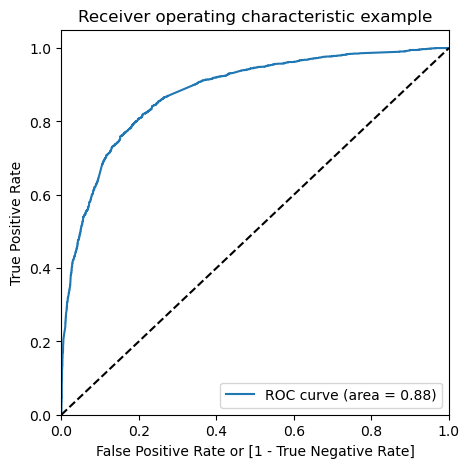

In [148]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

- The ROC Curve should be a value close to 1. We are getting a value of 0.88 indicating a good predictive model.
- AUC stands for Area under the ROC curve shows that 88% of the predictions are correct. hence more the AUC better the model.

### Finding Optimal Cutoff Point

- Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [149]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.302119,1871,0,1,1,1,1,0,0,0,0,0,0
1,0,0.169028,6795,0,1,1,0,0,0,0,0,0,0,0
2,0,0.270194,3516,0,1,1,1,0,0,0,0,0,0,0
3,0,0.828994,8105,1,1,1,1,1,1,1,1,1,1,0
4,0,0.230432,3934,0,1,1,1,0,0,0,0,0,0,0


In [150]:
# Now let's calculate accuracy, sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.381262     1.000000     0.000000
0.1          0.1  0.593228     0.969586     0.361319
0.2          0.2  0.741187     0.911192     0.636432
0.3          0.3  0.794063     0.842255     0.764368
0.4          0.4  0.811070     0.768045     0.837581
0.5          0.5  0.815708     0.699513     0.887306
0.6          0.6  0.797001     0.592052     0.923288
0.7          0.7  0.780767     0.506083     0.950025
0.8          0.8  0.757421     0.408759     0.972264
0.9          0.9  0.713976     0.268451     0.988506


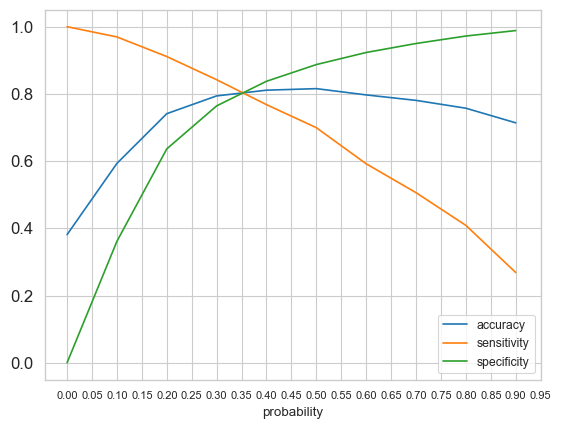

In [151]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
sns.set_style('whitegrid')
sns.set_context('paper')

cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.xticks(np.arange(0,1,step =.05),size = 8)
plt.yticks(size=12)
plt.show()

### Optimal Cut-off probability.
- From the curve above, 0.35 is the optimum point to take it as a cutoff probability.
- It means that at this point Accuracy,Sensitivity and Specificity are all same.

In [152]:
y_train_pred_final['Final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_predicted
0,0,0.302119,1871,0,1,1,1,1,0,0,0,0,0,0,1
1,0,0.169028,6795,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.270194,3516,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.828994,8105,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.230432,3934,0,1,1,1,0,0,0,0,0,0,0,0


In [153]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Final_predicted)

0.7940630797773655

In [154]:
# Confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Final_predicted )
confusion2

array([[3059,  943],
       [ 389, 2077]], dtype=int64)

In [155]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [156]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8422546634225466

In [157]:
# Let us calculate specificity
TN / float(TN+FP)

0.764367816091954

In [158]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.23563218390804597


In [159]:
# Positive predictive value 
print (TP / float(TP+FP))

0.687748344370861


In [160]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8871809744779582


## Precision and Recall
- To attain more stability and predict successfully in our model one needs to check two important parameters -precision and recall which tells us the score for result relevancy and how many truly relevant results are returned

In [161]:
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3551,  451],
       [ 741, 1725]], dtype=int64)

##### Precision
- Precision measures how good our model is when the prediction is positive.
- We need high precision in places such as recommendation engines, spam mail detection, etc. Where you don’t care about false negatives but focus more on true positives and false positives. It is ok if spam comes into the inbox folder but a really important mail shouldn’t go into the spam folder.
- TP / TP + FP

In [162]:
# Final Precision
precision = round(TP/float(TP+FP),2)
precision

0.69

##### Recall
- Recall measures how good our model is at correctly predicting positive classes.
- Models need high recall when you need output-sensitive predictions. For example, predicting cancer or predicting terrorists needs a high recall, in other words, you need to cover false negatives as well. It is ok if a non-cancer tumor is flagged as cancerous but a cancerous tumor should not be labeled non-cancerous.
- TP / TP + FN

In [163]:
# Final Recall
recall = round(TP/float(TP+FN),2)
recall

0.84

- Using sklearn utilities for the same

In [164]:
from sklearn.metrics import precision_score, recall_score

In [165]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.Final_predicted)

0.687748344370861

In [166]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.Final_predicted)

0.8422546634225466

- Since our model has a high Recall value of 84% so our model will consider the false negative values also as we dont want to leave any actual predicted person to be unpredicted.

### Precision and Recall tradeoff

In [167]:
from sklearn.metrics import precision_recall_curve

In [168]:
y_train_pred_final.Converted, y_train_pred_final.Final_predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: Converted, Length: 6468, dtype: int64,
 0       1
 1       0
 2       0
 3       1
 4       0
        ..
 6463    1
 6464    1
 6465    0
 6466    0
 6467    0
 Name: Final_predicted, Length: 6468, dtype: int64)

In [169]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

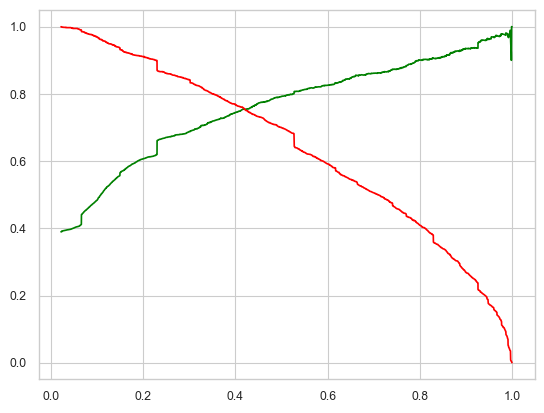

In [170]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

- This graph shows that Precision and Recall are inversely related as one increases other decreases.

## Making predictions on the test set¶

In [171]:
X_test[['TotalVisits','Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website']])

In [172]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Source_Olark Chat,Lead Source_Welingak Website,Current Occupation_Others,Current Occupation_Unemployed,Last Notable Activity_Others,Last Notable Activity_SMS Sent,Specialization_Not specified,Lead Origin_Lead Add Form,Last Activity_Email Bounced,Last Activity_Email Opened,Last Activity_Olark Chat Conversation
4269,0.964504,0,0,0,1,0,1,1,0,0,0,0
2376,-0.885371,0,0,0,1,0,1,1,1,0,0,0
7766,-0.777416,0,0,0,0,1,0,0,0,0,0,0
9199,-0.885371,1,0,0,1,0,0,1,0,0,0,1
4359,-0.885371,0,0,0,1,0,0,0,1,0,1,0


In [173]:
X_test_sm = sm.add_constant(X_test)

In [174]:
# Making predictions on test set
y_test_pred = res.predict(X_test_sm)

In [175]:
y_test_pred[:10]

4269    0.683822
2376    0.925877
7766    0.827405
9199    0.066465
4359    0.829046
9186    0.584474
1631    0.457417
8963    0.115985
8007    0.115090
5324    0.362665
dtype: float64

In [176]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [177]:
# Let's see the head
y_pred_1.head()

,0
4269,0.683822
2376,0.925877
7766,0.827405
9199,0.066465
4359,0.829046


In [178]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [179]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [180]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [181]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [182]:
y_pred_final.head()

,Converted,Prospect ID,0
0,1,4269,0.683822
1,1,2376,0.925877
2,1,7766,0.827405
3,0,9199,0.066465
4,1,4359,0.829046


In [183]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [184]:
# Rearranging the columns
y_pred_final = y_pred_final.iloc[:,[1,0,2]]

In [185]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [186]:
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_predicted
0,4269,1,0.683822,1
1,2376,1,0.925877,1
2,7766,1,0.827405,1
3,9199,0,0.066465,0
4,4359,1,0.829046,1


In [187]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8127705627705628

In [188]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1431,  246],
       [ 273,  822]], dtype=int64)

In [189]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [190]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7506849315068493

In [191]:
# Let us calculate specificity
TN / float(TN+FP)

0.853309481216458

In [192]:
precision_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7696629213483146

In [193]:
recall_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7506849315068493

### Final Observation
- Lets see the model parameters obtained for Train and Test data.

### Train Data
- Accuracy - 80.00%
- Sensitivity - 84.22%
- Specificity - 76.43%
- Precision - 69.00%
- Recall - 84.22%

### Test Data
- Accuracy - 81.27%
- Sensitivity - 84.22%
- Specificity - 76.43%
- Precision - 77.00%
- Recall - 75.06%

## Conclusion

We got around 1% difference on train and test data's performance metrics.This implies that our final model didn't overfit training data and is performing well.

High Sensitivity will ensure that almost all leads who are likely to Convert are correctly predicted where as high Specificity will ensure that leads that are on the brink of the probability of getting Converted or not are not selected.

Depending on the business requirement, we can increase or decrease the probability threshold value with in turn will decrease or increase the Sensitivity and increase or decrease the Specificity of the model.

## Recommendations:

#### The Team should focus on following variables:
1.	#### Total Time Spent on Website
    - From The Boxplot we can see that number of constumers who have converted spent more time on the website.so try to make           them engage in the website and increase their chances of getting converted.
    - Try to give them offers exclusive on websites so they gets attracted to it.
2.	#### Lead Source
    - _Olark Chat:_
        - We can see that olark chat has majority of lead conversions in terms of count, so focus on increasing the lead                   conversions to this categories.
	- _Welingak Website:_
        - Welingak website has higher number of lead conversion rate but count is low.so you can improve and learn from here               that might help you in improving other categories.
3.  #### Lead Origin
    - _Lead Add Form:_
        - Lead add form has higher number of lead conversion rate so you can improve and learn from here that might help you in           improving other categories.
4.	#### Current Occupation
    - _Unemployed:_
        - Unemployed has highest number of conversions by count but conversion rate is low so focus on increasing the conversion           rate on unemployed as it is obvious that unemployed will be most interested in getting a new job by learning something           new.
    - _Others:_ 
        - Others contains Student,Housewife and Businessmen so focus on them more, try to increase their conversion score to               more then 35 which are potential customers.
5.  #### Last Activity
    - _Olark Chat Conversation:_
        - Need to focus more on Olark chat as the conversion rate is poor.
    - _Email Bounced:_
        - The conversion rate is not good seems to be very poor so focus here also.
    - _Email Opened:_
        - Most leads are generated by email opened so this is an important category that you should focus on.Although having               most conversion counts by number the conversion rate is not good.
6.	#### Last Notable Activity
    - _SMS Sent:_
        - SMS sent has good conversion rate and so there is chance of improvance more.
    - _Others:_
        - Others has many categories such as 'Unreachable','Unsubscribed','Email Bounced','Had a Phone Conversation',
          'Approached upfront','View in browser link Clicked','Email Received','Email Marked Spam','Form Submitted on Website',
          'Resubscribed to emails'.
        - Since the lead count and converted count is less try on increasing the number as your leads score depends on this.
7.	#### Specialization 
    - _Not specified:_
        - As most of the customers has opted to not provide their specialization so avoid using this feature.
Focus on leads having conversion score more then 35 which are potential leads also known as 'Hot leads'